# Importing all the Neccesary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve
import warnings

warnings.filterwarnings("ignore")

In [2]:
import os
print(os.getcwd())


/Users/anandnaik/Desktop/Liver_Disease_Prediction


# Reading the Datset 

In [3]:
Liver_disease_Dataset=pd.read_csv('/Users/anandnaik/Desktop/Liver_Disease_Prediction/Indian Liver Patient Dataset (ILPD) 3.csv')
Liver_disease_Dataset

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Naming the coloumn by using Dictionary

In [4]:
import pandas as pd

# Define the column names
column_names = [
    "Age", "Gender", "Total_Bilirubin", "Direct_Bilirubin",
    "Alkaline_Phosphotase", "Alamine_Aminotransferase", "Aspartate_Aminotransferase",
    "Total_Protiens", "Albumin", "Albumin_and_Globulin_Ratio", "Dataset"
]

# Read the CSV and assign column names
Liver_disease_Dataset= pd.read_csv('/Users/anandnaik/Desktop/Liver_Disease_Prediction/Indian Liver Patient Dataset (ILPD) 3.csv', names=column_names)
Liver_disease_Dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
Liver_disease_Dataset.shape

(583, 11)

In [6]:
Liver_disease_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
Liver_disease_Dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [8]:
Liver_disease_Dataset.dtypes[Liver_disease_Dataset.dtypes=='object']

Gender    object
dtype: object

In [9]:
Liver_disease_Dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [10]:
Liver_disease_Dataset['Dataset'] = Liver_disease_Dataset['Dataset'].apply(lambda x: 0 if x == 2 else 1)


In [11]:
Liver_disease_Dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


<Axes: xlabel='count', ylabel='Gender'>

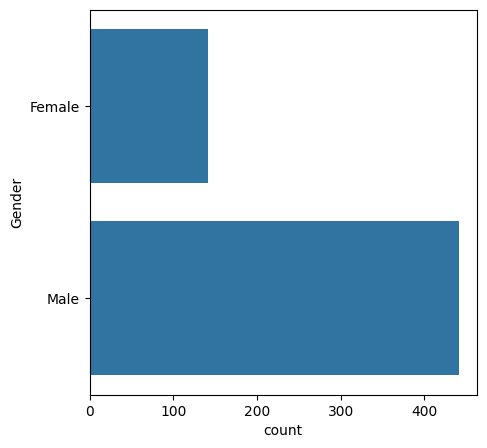

In [12]:
import seaborn as sns
Liver_disease_Dataset.describe(include=['object'])
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=Liver_disease_Dataset)

In [13]:
Liver_disease_Dataset[Liver_disease_Dataset['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


Number of patients that are male:  441
Number of patients that are female:  142


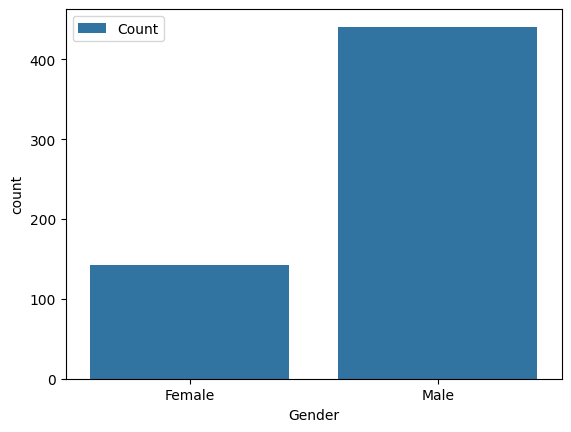

In [14]:
sns.countplot(data=Liver_disease_Dataset, x = 'Gender', label='Count')

M, F = Liver_disease_Dataset['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [15]:
## if score is equal to negative, i am marking as 0 otherwise its 1 
def partition(x):
    if x =='Male':
        return 0
    return 1

Liver_disease_Dataset['Gender'] = Liver_disease_Dataset['Gender'].map(partition)

In [16]:
Liver_disease_Dataset.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


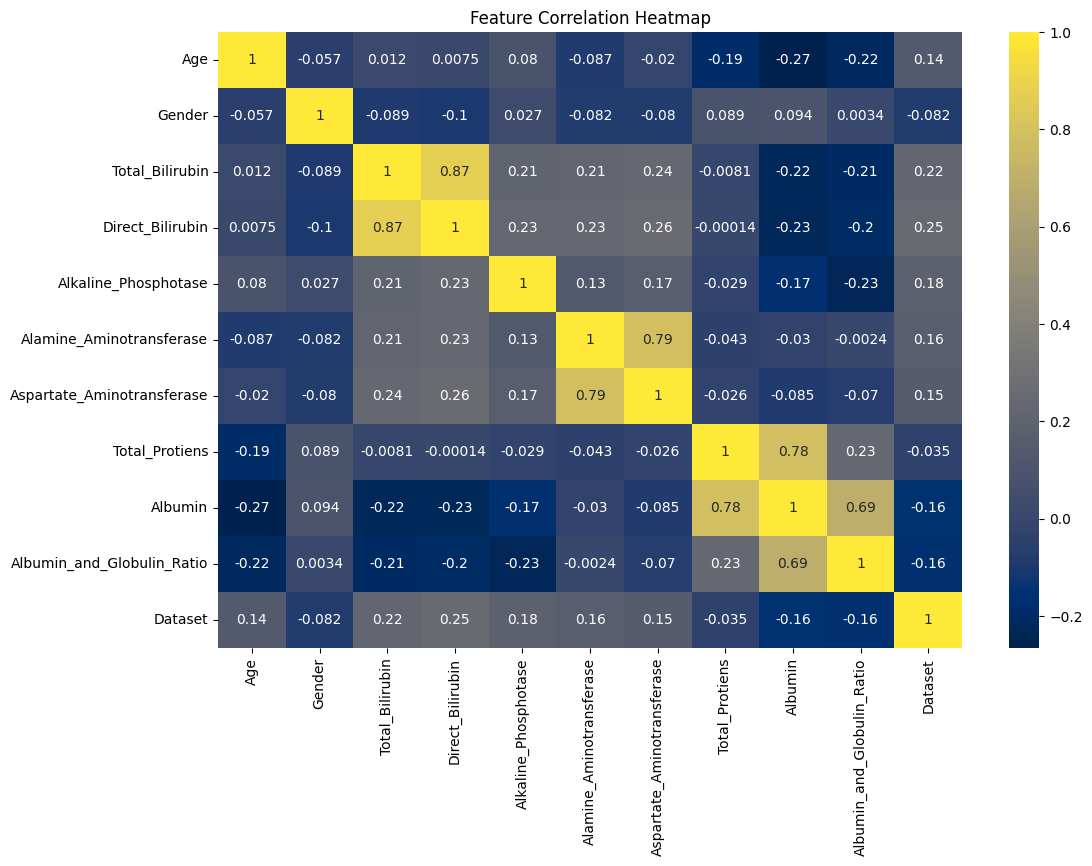

In [17]:
#Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(Liver_disease_Dataset.corr(), annot=True, cmap='cividis')
plt.title('Feature Correlation Heatmap')
plt.show()

# Pair Plot

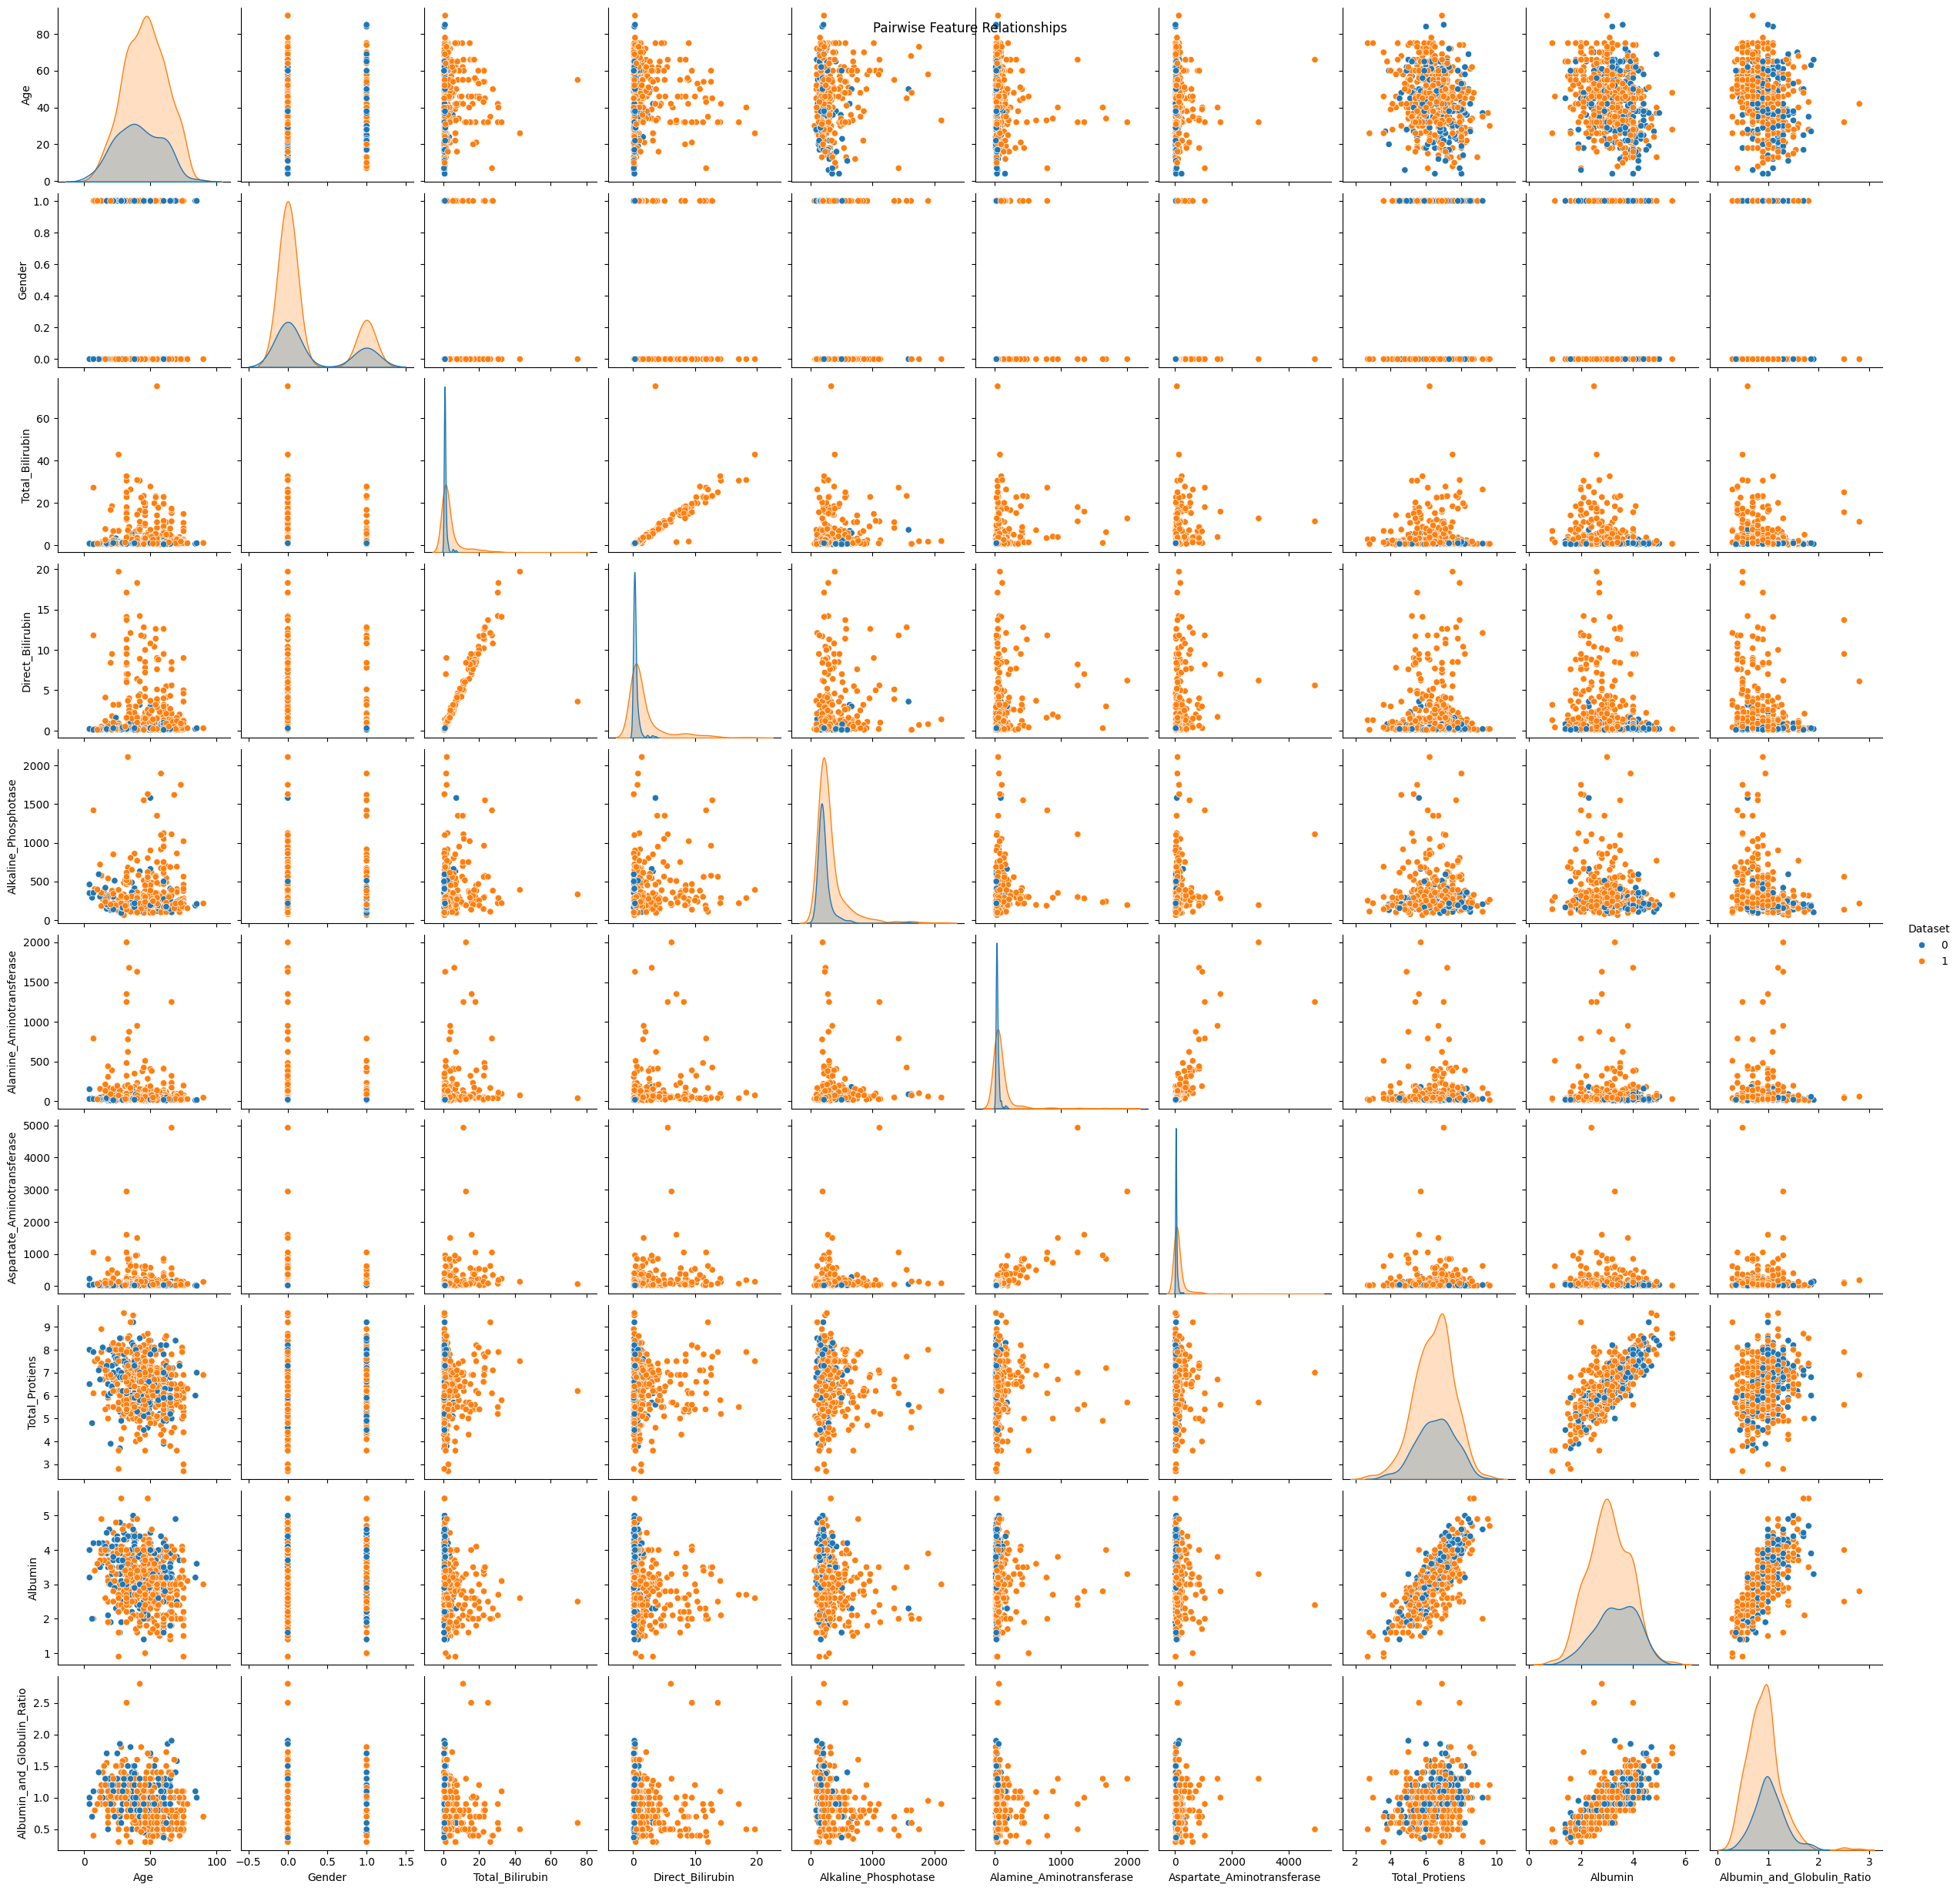

In [18]:
sns.pairplot(Liver_disease_Dataset, hue='Dataset', diag_kind='kde')
plt.suptitle('Pairwise Feature Relationships')
plt.show()


# Boxplot to Detect Outliers

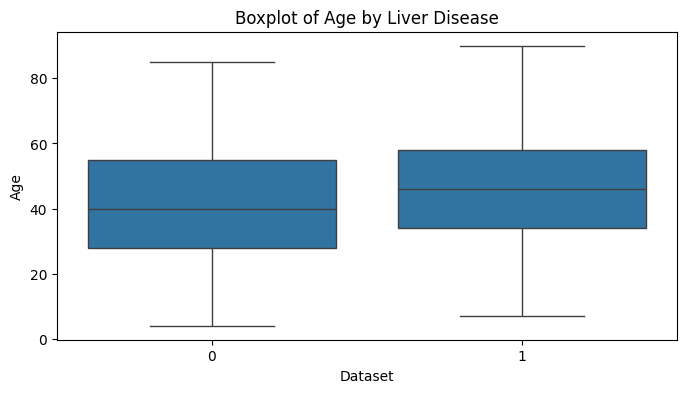

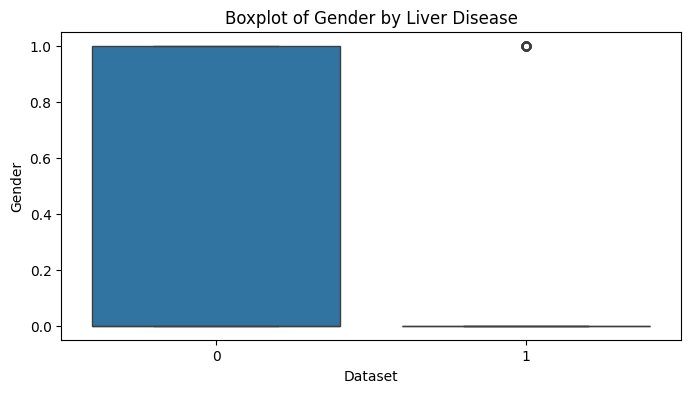

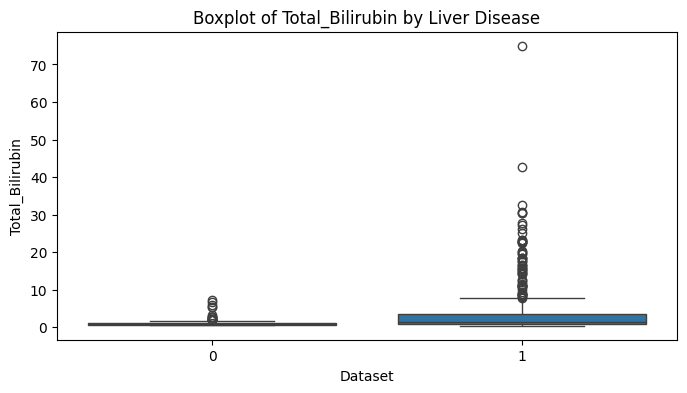

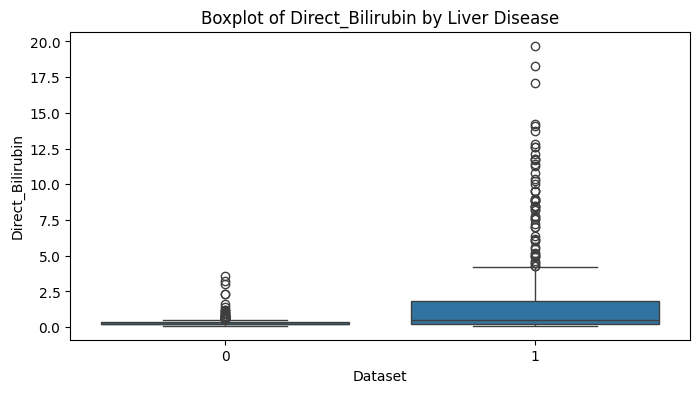

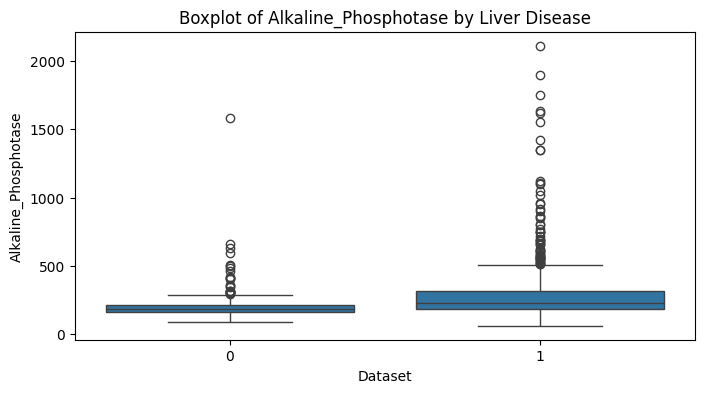

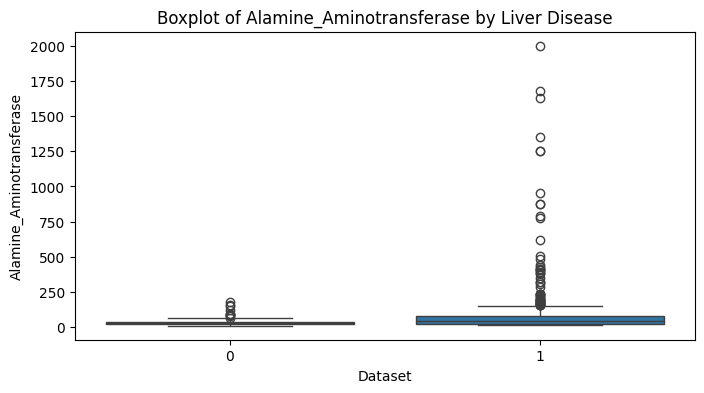

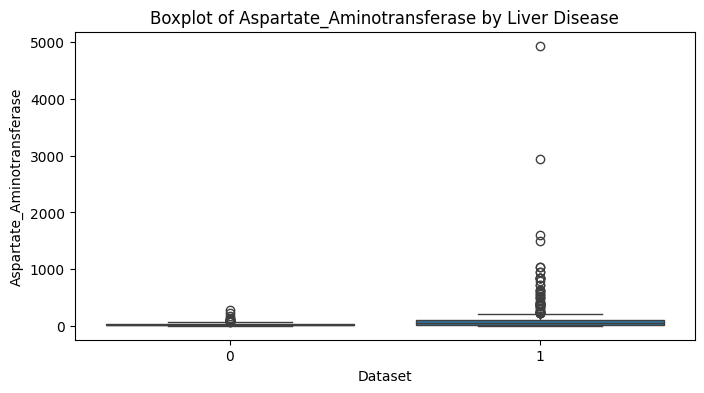

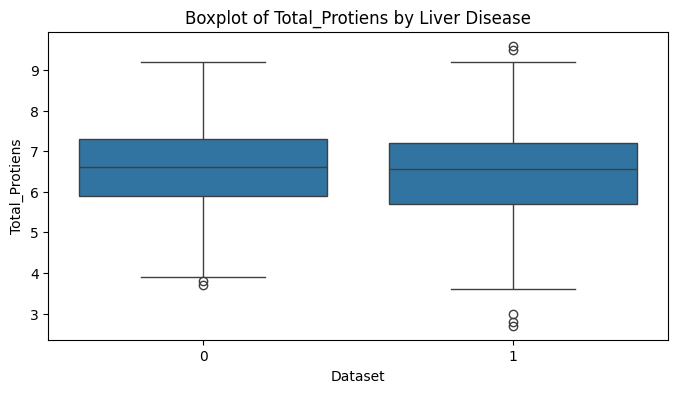

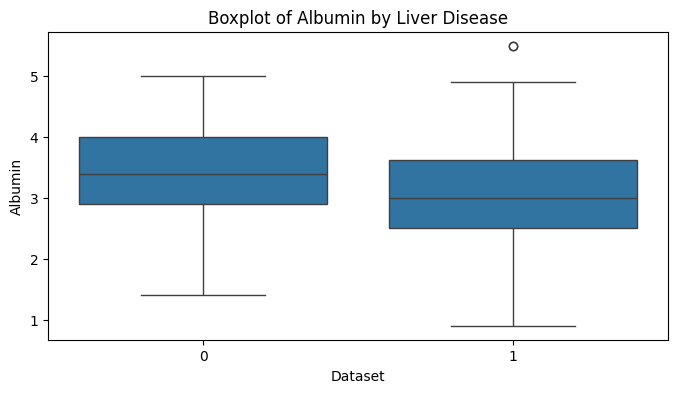

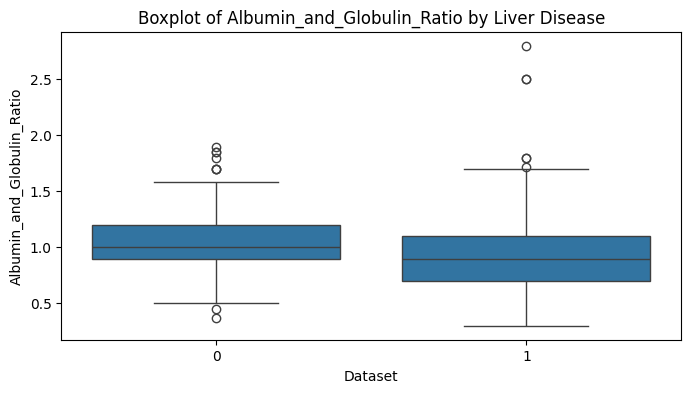

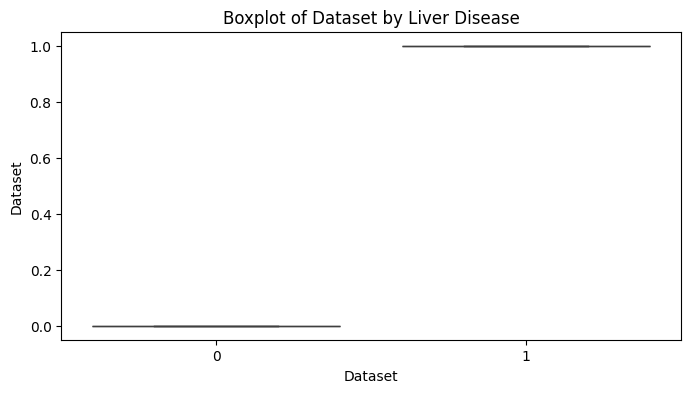

In [19]:
for col in Liver_disease_Dataset.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Dataset', y=col, data=Liver_disease_Dataset)
    plt.title(f'Boxplot of {col} by Liver Disease')
    plt.show()

## Data Cleaning

In [20]:
Liver_disease_Dataset = Liver_disease_Dataset.drop_duplicates()
print( Liver_disease_Dataset.shape )

(570, 11)


There were 13 duplicates

## Removing Outliers

<Axes: ylabel='Aspartate_Aminotransferase'>

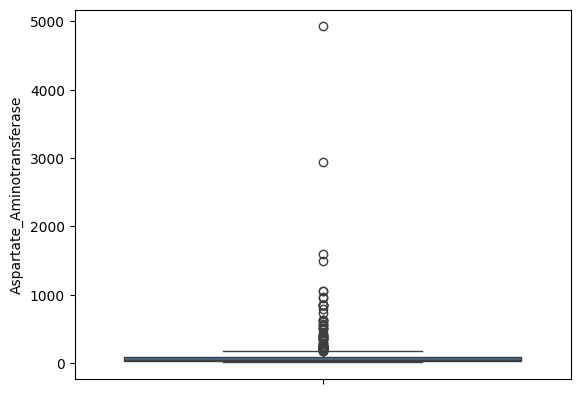

In [21]:
sns.boxplot(Liver_disease_Dataset.Aspartate_Aminotransferase)

In [22]:
Liver_disease_Dataset.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [23]:
Liver_disease_Dataset = Liver_disease_Dataset[Liver_disease_Dataset.Aspartate_Aminotransferase <=3000 ]
Liver_disease_Dataset.shape

(569, 11)

<Axes: ylabel='Aspartate_Aminotransferase'>

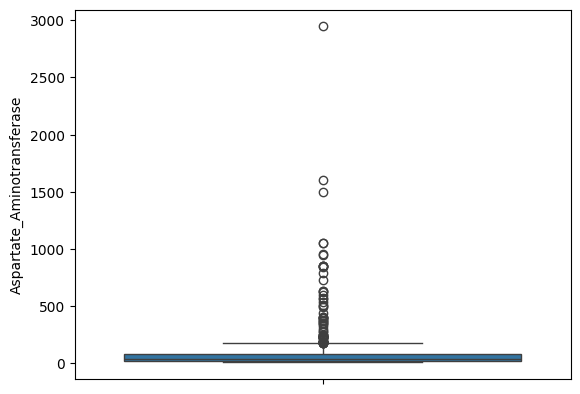

In [24]:
sns.boxplot(Liver_disease_Dataset.Aspartate_Aminotransferase)

In [25]:
Liver_disease_Dataset.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [26]:
Liver_disease_Dataset = Liver_disease_Dataset[Liver_disease_Dataset.Aspartate_Aminotransferase <=2500 ]
Liver_disease_Dataset.shape

(568, 11)

In [27]:
Liver_disease_Dataset.isnull().values.any()

True

In [28]:
Liver_disease_Dataset=Liver_disease_Dataset.dropna(how='any')  

In [29]:
Liver_disease_Dataset.shape

(564, 11)

In [30]:
Liver_disease_Dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Machine Learning Models

### Data Preparation

In [31]:
# Creating the separate object for target variable
y = Liver_disease_Dataset.Dataset

# Creating the separate object for input features
X = Liver_disease_Dataset.drop('Dataset', axis=1)

In [32]:
# Splitting X and y into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=1234,
                                                    stratify=Liver_disease_Dataset.Dataset)



In [33]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(423, 10) (141, 10) (423,) (141,)


In [34]:
train_mean = X_train.mean()
train_std = X_train.std()

In [35]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [36]:
## Check for mean and std dev.
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,4.230000e+02,4.230000e+02,4.230000e+02,4.230000e+02,4.230000e+02,4.230000e+02,4.230000e+02,4.230000e+02,4.230000e+02,4.230000e+02
mean,-1.093819e-16,7.558965e-17,-2.215197e-16,-1.060617e-15,-9.264982e-17,-6.824066e-17,5.262405e-17,-3.705993e-16,-2.373069e-15,1.649357e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.486234e+00,-5.884837e-01,-4.534968e-01,-4.981148e-01,-9.119371e-01,-3.952225e-01,-5.038798e-01,-3.530556e+00,-2.851401e+00,-2.011646e+00
25%,-7.147057e-01,-5.884837e-01,-3.920180e-01,-4.619054e-01,-4.594510e-01,-3.164302e-01,-4.147789e-01,-6.685271e-01,-7.279106e-01,-7.892243e-01
50%,1.834060e-02,-5.884837e-01,-3.612786e-01,-4.256960e-01,-3.258978e-01,-2.436988e-01,-3.137979e-01,7.006111e-02,2.155678e-02,1.011817e-01
75%,7.513869e-01,1.695265e+00,-1.153635e-01,-6.360187e-02,2.492842e-02,-9.520559e-02,-6.728555e-02,6.240023e-01,8.959354e-01,4.030143e-01
max,2.767264e+00,1.695265e+00,1.101229e+01,6.598929e+00,7.248760e+00,9.726560e+00,8.940812e+00,2.839767e+00,2.894515e+00,5.534168e+00


In [37]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [38]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.042169,-0.118777,-0.026089,0.021144,-0.007248,-0.013168,0.035444,-0.106074,-0.180427,-0.220987
std,0.978261,0.926366,0.852957,1.105051,0.887805,0.753676,1.098398,1.019860,0.970509,0.827055
min,-2.364060,-0.588484,-0.438127,-0.498115,-0.804297,-0.395222,-0.486060,-3.438233,-2.851401,-2.011646
25%,-0.714706,-0.588484,-0.392018,-0.461905,-0.469418,-0.322491,-0.420719,-0.760851,-0.852822,-0.804316
50%,0.018341,-0.588484,-0.376648,-0.425696,-0.341844,-0.261882,-0.331618,-0.022262,-0.228266,-0.200651
75%,0.812474,-0.588484,-0.146103,-0.136021,0.004995,-0.043688,-0.028675,0.531679,0.521202,0.101182
max,2.461828,1.695265,4.218890,6.091998,5.295295,5.302068,8.346806,2.193502,2.145048,2.515842


In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())


Before SMOTE: 1    301
0    122
Name: Dataset, dtype: int64
After SMOTE: 1    301
0    301
Name: Dataset, dtype: int64


# 1. Training with Random Forest

=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.45      0.75      0.57        40
           1       0.87      0.64      0.74       101

    accuracy                           0.67       141
   macro avg       0.66      0.70      0.65       141
weighted avg       0.75      0.67      0.69       141

Confusion Matrix:
 [[30 10]
 [36 65]]
F1 Score: 0.7386363636363636
Balanced Accuracy: 0.6967821782178218
ROC AUC Score: 0.7381188118811881


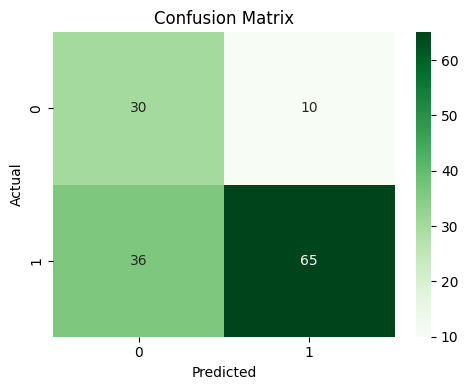

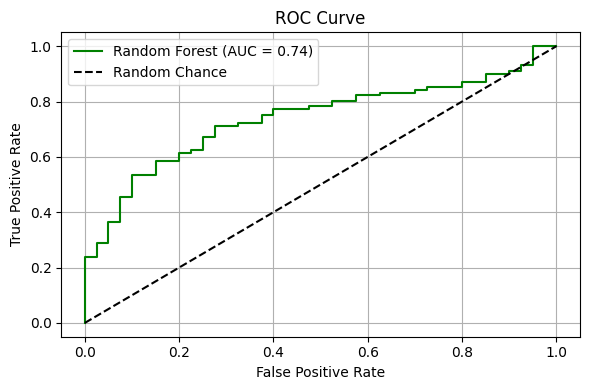

In [40]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                             roc_curve, f1_score, balanced_accuracy_score)
from imblearn.over_sampling import SMOTE


#  Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

#  Train Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
rf_model.fit(X_train_sm, y_train_sm)

#  Predictions
y_pred = rf_model.predict(X_test_scaled)
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]  # for binary classification


#  Evaluation Metrics
print(" Random Forest Classification Report ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

#  Confusion Matrix Plot
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

#  ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob):.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 2. Training with XGBoost

In [41]:

# Now we can train XGBoost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_sm, y_train_sm)

# Predictions and evaluation code follow


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

=== XGBoost Classification Report ===
              precision    recall  f1-score   support

           0       0.49      0.47      0.48        40
           1       0.79      0.80      0.80       101

    accuracy                           0.71       141
   macro avg       0.64      0.64      0.64       141
weighted avg       0.71      0.71      0.71       141

Confusion Matrix:
 [[19 21]
 [20 81]]
ROC AUC Score: 0.772029702970297


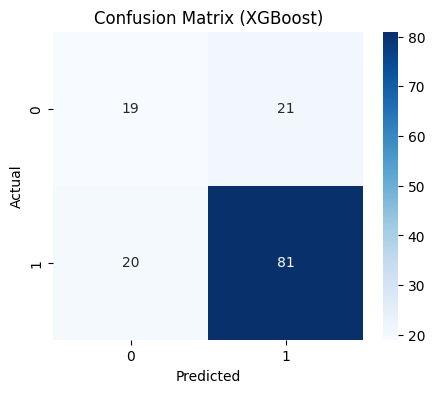

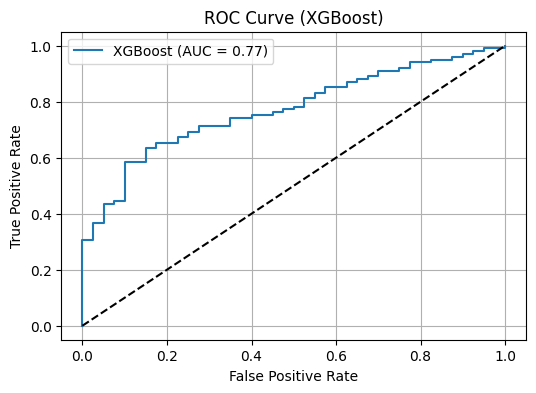

In [42]:
from xgboost import XGBClassifier

# Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_sm, y_train_sm)

# Predict with XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print(" XGBoost Classification Report")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_xgb))

# Confusion Matrix Plot for XGBoost
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_xgb)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost)")
plt.legend()
plt.grid(True)
plt.show()


# 3.Logistic Regression 

==== Logistic Regression with class_weight='balanced' ====
              precision    recall  f1-score   support

           0       0.44      0.85      0.58        40
           1       0.91      0.57      0.70       101

    accuracy                           0.65       141
   macro avg       0.67      0.71      0.64       141
weighted avg       0.77      0.65      0.67       141

Confusion Matrix:
 [[34  6]
 [43 58]]
ROC AUC Score: 0.7247524752475247


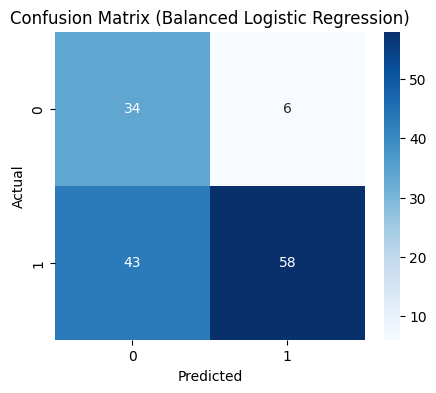

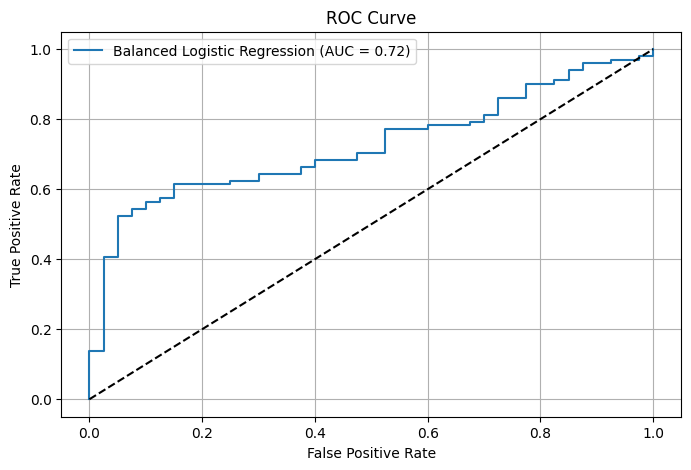


==== Logistic Regression with SMOTE Oversampling ====
              precision    recall  f1-score   support

           0       0.42      0.82      0.56        40
           1       0.89      0.55      0.68       101

    accuracy                           0.63       141
   macro avg       0.66      0.69      0.62       141
weighted avg       0.76      0.63      0.65       141

Confusion Matrix:
 [[33  7]
 [45 56]]
ROC AUC Score: 0.7301980198019802


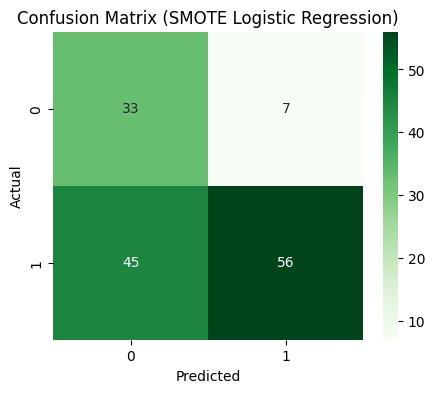

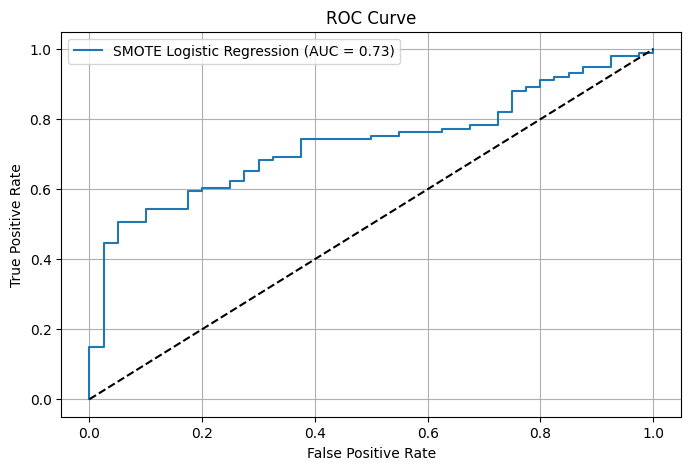

In [43]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_balanced = LogisticRegression(class_weight='balanced', random_state=42)
model_balanced.fit(X_train_scaled, y_train)
y_pred_bal = model_balanced.predict(X_test_scaled)
y_prob_bal = model_balanced.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression with class_weight='balanced'")
print(classification_report(y_test, y_pred_bal))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bal))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_bal))

# Confusion Matrix Plot
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_bal), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Balanced Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_bal)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='Balanced Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_bal)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

print("\n Logistic Regression with SMOTE Oversampling")

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

# Train Logistic Regression on oversampled data
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_train_sm, y_train_sm)
y_pred_sm = model_smote.predict(X_test_scaled)
y_prob_sm = model_smote.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred_sm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sm))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_sm))

# Confusion Matrix Plot
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_sm), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (SMOTE Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_sm, tpr_sm, _ = roc_curve(y_test, y_prob_sm)
plt.figure(figsize=(8, 5))
plt.plot(fpr_sm, tpr_sm, label='SMOTE Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_sm)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


# 4. Support Vector Machine

=== SVM Classification Report ===
              precision    recall  f1-score   support

           0       0.45      0.85      0.59        40
           1       0.91      0.58      0.71       101

    accuracy                           0.66       141
   macro avg       0.68      0.72      0.65       141
weighted avg       0.78      0.66      0.68       141

Confusion Matrix:
 [[34  6]
 [42 59]]
ROC AUC Score: 0.7217821782178218


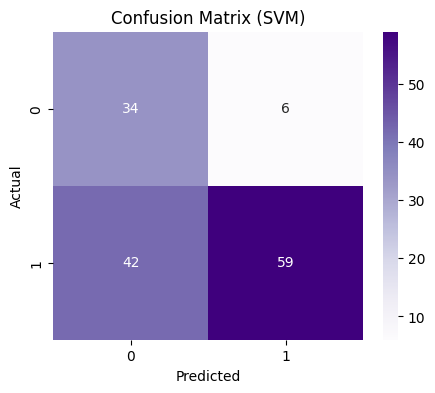

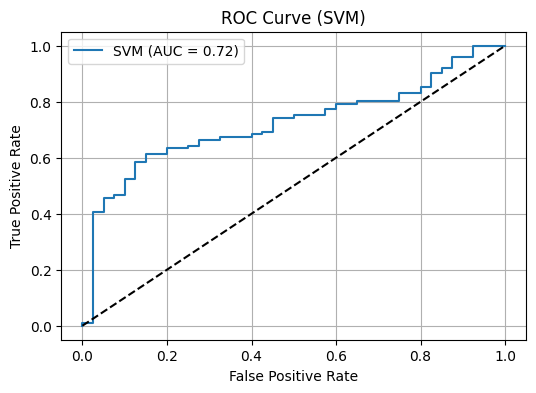

In [44]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

# Train SVM model with probability=True for ROC curve
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train_sm, y_train_sm)

# Predict
y_pred_svm = svm_model.predict(X_test_scaled)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_svm))

# Confusion Matrix Plot
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_svm)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (SVM)")
plt.legend()
plt.grid(True)
plt.show()


# 5.Decission Tree

=== Decision Tree Classification Report (Initial) ===
              precision    recall  f1-score   support

           0       0.44      0.72      0.55        40
           1       0.85      0.63      0.73       101

    accuracy                           0.66       141
   macro avg       0.65      0.68      0.64       141
weighted avg       0.74      0.66      0.68       141

Confusion Matrix:
 [[29 11]
 [37 64]]
ROC AUC Score: 0.6813118811881187


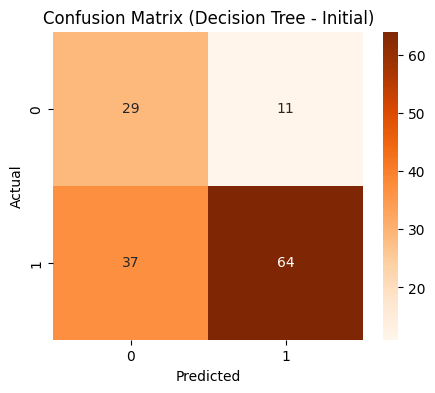

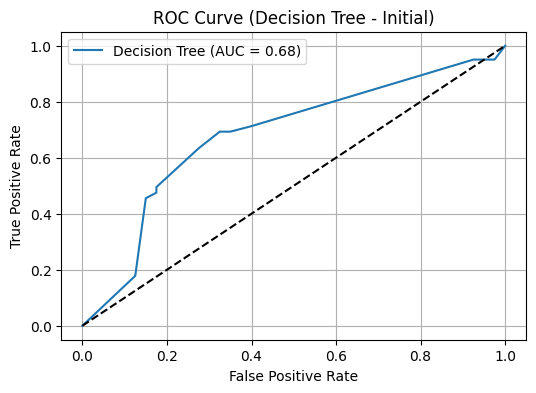

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 20}
Best ROC AUC Score (CV): 0.7883192167577414
=== Decision Tree Classification Report (Tuned) ===
              precision    recall  f1-score   support

           0       0.41      0.60      0.49        40
           1       0.81      0.66      0.73       101

    accuracy                           0.65       141
   macro avg       0.61      0.63      0.61       141
weighted avg       0.70      0.65      0.66       141

Confusion Matrix:
 [[24 16]
 [34 67]]
ROC AUC Score: 0.6928217821782178


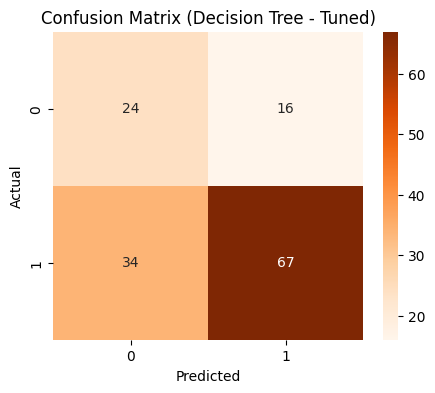

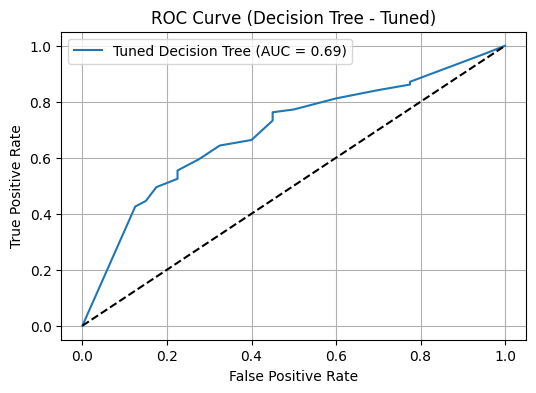

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

# Train initial Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train_sm, y_train_sm)

# Predict
y_pred_dt = dt_model.predict(X_test_scaled)
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("=== Decision Tree Classification Report (Initial) ===")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_dt))

# Confusion Matrix Plot
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix (Decision Tree - Initial)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_dt)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Decision Tree - Initial)")
plt.legend()
plt.grid(True)
plt.show()

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_sm, y_train_sm)

print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score (CV):", grid_search.best_score_)

# Train final Decision Tree with best parameters
best_dt_model = grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test_scaled)
y_prob_dt = best_dt_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Decision Tree Classification Report (Tuned)")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_dt))

# Confusion Matrix Plot
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix (Decision Tree - Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label='Tuned Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_dt)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Decision Tree - Tuned)")
plt.legend()
plt.grid(True)
plt.show()


# Comparission of all the Models 


Model Comparison:


,Model,Accuracy,F1 Score,Precision,Recall,ROC-AUC
0,Logistic Regression,0.652482,0.703030,0.906250,0.574257,0.724752
1,Decision Tree,0.659574,0.769231,0.747664,0.792079,0.558540
2,Random Forest,0.702128,0.810811,0.743802,0.891089,0.740347
3,Gradient Boosting,0.659574,0.775701,0.734513,0.821782,0.723515
4,SVM,0.652482,0.699387,0.919355,0.564356,0.728465


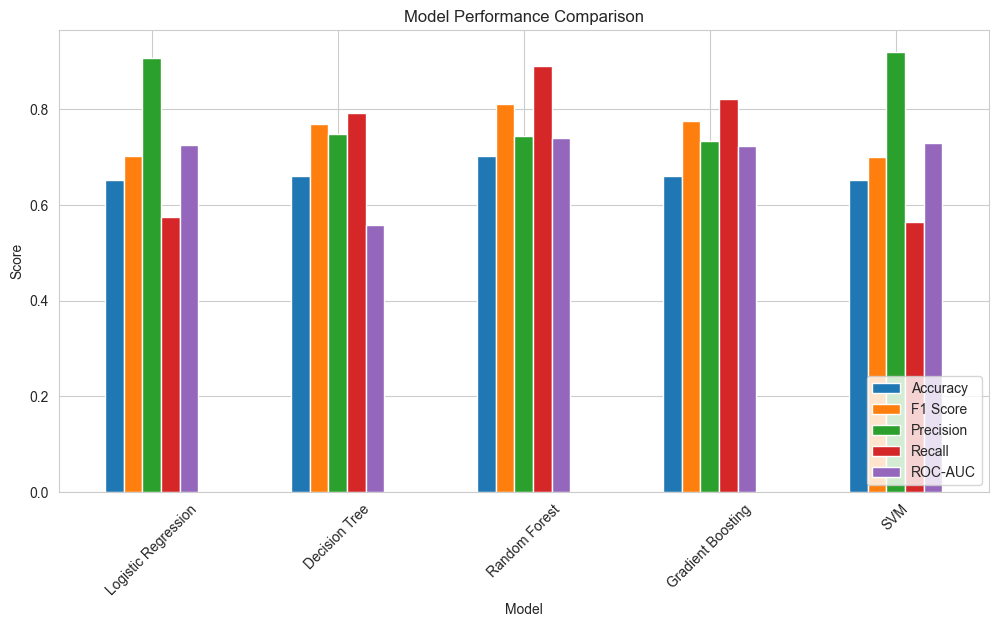

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,
    classification_report, confusion_matrix
)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42, class_weight="balanced"),
   
}

results = []

# Train & evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "Precision": prec,
        "Recall": rec,
        "ROC-AUC": roc
    })

# Collect results in DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
display(results_df)

# Plot comparison
results_df.set_index("Model").plot(kind="bar", figsize=(12,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()
